### Imports

In [1]:
# Imports and GPU check
%matplotlib inline
import os
import random
import time
from tqdm import tqdm
from itertools import product
from PIL import Image

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# sklearn imports
from sklearn.model_selection import train_test_split

np.random.seed(2065718)

## Data Preparation

In [2]:
# Import the csv from path.
label_path = "data\pizza_data\imageLabels.txt"
column_path = "data\pizza_data\categories.txt"
image_path = "data\pizza_data\images"

df = pd.read_csv(label_path, sep="  ", header=None)
df.columns = open(column_path, "r").read().split("\n")[:-1]
classes = len(open(column_path, "r").read().split("\n")[:-1]) + 1
open(column_path, "r").close()


# Encode a label of pizzas without labeled toppings.
# df["plain"] = 0
df["image_name"] = df.apply(
    lambda x: os.path.join(image_path, str(x.name + 1).zfill(5) + ".jpg"), axis=1
)
# df.loc[df.iloc[:, 1:-1].max(axis=1) == 0, "plain"] = 1

# Split the data in training and validation.
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=7)
train_df

C:\Users\20202016\AppData\Local\Temp\ipykernel_17692\2008146030.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(label_path, sep="  ", header=None)


,Pepperoni,Bacon,Mushrooms,Onions,Peppers,Black olives,Tomatoes,Spinach,Fresh basil,Arugula,Broccoli,Corn,Pineapple,image_name
2091,0,1,0,1,0,0,1,0,0,0,0,0,0,data\pizza_data\images\02092.jpg
7311,0,0,0,0,0,1,0,0,0,0,0,0,0,data\pizza_data\images\07312.jpg
2855,0,0,1,0,0,0,1,0,1,0,0,0,0,data\pizza_data\images\02856.jpg
8371,0,0,0,0,0,0,0,0,1,0,0,0,0,data\pizza_data\images\08372.jpg
4000,0,0,0,0,0,0,0,0,0,0,0,0,0,data\pizza_data\images\04001.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,0,1,0,0,0,0,0,0,1,0,0,0,0,data\pizza_data\images\01373.jpg
919,0,0,0,1,0,0,0,0,0,0,0,0,0,data\pizza_data\images\00920.jpg
4307,0,0,0,0,0,0,1,0,0,0,0,0,0,data\pizza_data\images\04308.jpg
5699,0,0,0,0,0,0,0,0,0,0,0,0,0,data\pizza_data\images\05700.jpg


## RandomOverSampling

In [16]:
pip install git+https://github.com/phiyodr/multilabel-oversampling

  Cloning https://github.com/phiyodr/multilabel-oversampling to c:\users\20202016\appdata\local\temp\pip-req-build-x4rt7fpt
  Resolved https://github.com/phiyodr/multilabel-oversampling to commit 5fa066171b8df7ef369fe4f0c674f9576a106b0e
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for multilabel-oversampling: filename=multilabel_oversampling-0.1.3-py3-none-any.whl size=6283 sha256=50ab1eaa8f3bca19ff3f2256515876372bb29c50a4a06e7d55605fa1e57dbfd9
  Stored in directory: C:\Users\20202016\AppData\Local\Temp\pip-ephem-wheel-cache-5cl2xodv\wheels\7a\c0\6d\cf37d48b9a0739c145145769b121110350b279962f56e86d0a
Successfully built multilabel-oversampling
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/phiyodr/multilabel-oversampling 'C:\Users\20202016\AppData\Local\Temp\pip-req-build-x4rt7fpt'


In [3]:
import multilabel_oversampling as mo

In [6]:
train_df = train_df[train_df.columns[:-1]]
mo.seed_everything(7)
# Apply Upsampling based on train_dataset.df
moer = mo.MultilabelOversampler(
    number_of_adds=len(train_df) * 3, number_of_tries=len(train_df) * 3
)
df_new = moer.fit(
    df=train_df, target_list=train_df.columns
)  # Apply oversampling, this might take some time.

Start the upsampling process.


Iteration:  42%|████▏     | 9292/22110 [10:37<14:39, 14.58it/s]  

Iter 9292: No improvement after 22110 tries.
Sampling done.

Dataset size original: 7370; Upsampled dataset size: 16662
Original target distribution:  {'Pepperoni': 1613, 'Bacon': 151, 'Mushrooms': 701, 'Onions': 740, 'Peppers': 652, 'Black olives': 691, 'Tomatoes': 1465, 'Spinach': 338, 'Fresh basil': 1038, 'Arugula': 175, 'Broccoli': 63}
Upsampled target distribution: {'Pepperoni': 1949, 'Bacon': 1949, 'Mushrooms': 1949, 'Onions': 1949, 'Peppers': 1949, 'Black olives': 1949, 'Tomatoes': 1950, 'Spinach': 1949, 'Fresh basil': 1949, 'Arugula': 1949, 'Broccoli': 1949}


NameError: name 'train_dataset' is not defined

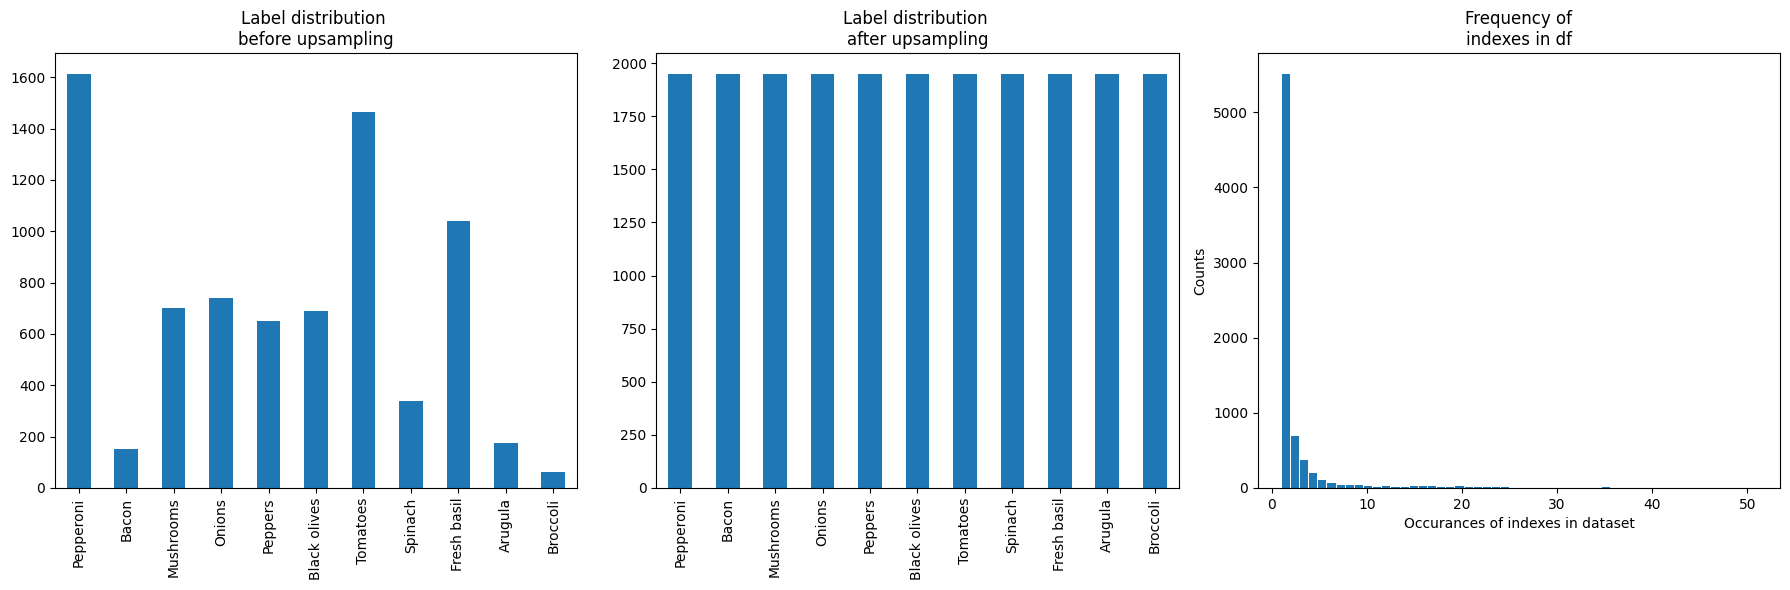

In [8]:
fig = plt.figure(figsize=(18, 6))
p = moer.plot_results()

In [16]:
df_new

,Pepperoni,Bacon,Mushrooms,Onions,Peppers,Black olives,Tomatoes,Spinach,Fresh basil,Arugula,Broccoli
2091,0,1,0,1,0,0,1,0,0,0,0
7311,0,0,0,0,0,1,0,0,0,0,0
2855,0,0,1,0,0,0,1,0,1,0,0
8371,0,0,0,0,0,0,0,0,1,0,0
4000,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
519,0,0,0,0,0,0,0,1,0,0,0
2643,0,0,1,0,0,0,0,0,0,0,0
5718,0,0,0,0,0,0,0,0,0,0,1
7846,0,1,0,0,0,0,0,0,0,0,0


In [14]:
from collections import Counter
import itertools

# Create a list of all possible topping combinations
all_toppings = df_new.columns
topping_combinations = [
    ",".join(combo)
    for i in range(1, len(all_toppings) + 1)
    for combo in itertools.combinations(all_toppings, i)
]

# Count the frequency of each topping combination
combo_counts = Counter()
for row in df_new.itertuples(index=False):
    toppings = [t for t, v in zip(all_toppings, row) if v == 1]
    combo_counts[",".join(toppings)] += 1

# Sort the combinations by frequency and print the top 10
top_combos = combo_counts.most_common(10)
print("Top 10 Topping Combinations:")
for combo, count in top_combos:
    print(f"{combo}: {count}")

Top 10 Topping Combinations:
: 2299
Spinach: 1278
Arugula: 1253
Fresh basil: 1171
Pepperoni: 1125
Bacon: 1038
Mushrooms: 779
Peppers: 635
Broccoli: 558
Tomatoes: 512


In [17]:
df_new.to_pickle("improved-dataset.pkl")

## Testing

In [18]:
# Imports and GPU check
%matplotlib inline
import os
import random
import time
from tqdm import tqdm
from itertools import product
from PIL import Image

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from torchsummary import summary
import torch
import torch.nn.init as init
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision import models

from sklearn.model_selection import train_test_split

# Check for GPU availability
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [19]:
def set_seed(seed=7):
    """Sets the seed for reproducibility."""
    # Python RNG
    random.seed(seed)

    # PyTorch RNGs
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

    # Numpy RNG
    np.random.seed(seed)

    # OS RNG
    os.environ["PYTHONHASHSEED"] = str(seed)


def worker_init_fn(worker_id):
    """Ensure that the data loading process is deterministic."""
    np.random.seed(np.random.get_state()[1][0] + worker_id)


set_seed(7)

In [20]:
# Hyperparameters
batch_size = 30
dataset_size = 5000  # Reduced dataset size for quicker training

epochs = 20
learning_rate = 0.01

In [30]:
sampled_df = pd.read_pickle("improved-dataset.pkl")

sampled_df["image_name"] = df.apply(
    lambda x: os.path.join(image_path, str(x.name + 1).zfill(5) + ".jpg"), axis=1
)


# Split the data in training and validation.
train_df, test_df = train_test_split(
    sampled_df, train_size=0.8, shuffle=True, random_state=7
)

In [65]:
sampled_df

,Pepperoni,Bacon,Mushrooms,Onions,Peppers,Black olives,Tomatoes,Spinach,Fresh basil,Arugula,Broccoli,image_name
2091,0,1,0,1,0,0,1,0,0,0,0,data\pizza_data\images\02092.jpg
7311,0,0,0,0,0,1,0,0,0,0,0,data\pizza_data\images\07312.jpg
2855,0,0,1,0,0,0,1,0,1,0,0,data\pizza_data\images\02856.jpg
8371,0,0,0,0,0,0,0,0,1,0,0,data\pizza_data\images\08372.jpg
4000,0,0,0,0,0,0,0,0,0,0,0,data\pizza_data\images\04001.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
519,0,0,0,0,0,0,0,1,0,0,0,data\pizza_data\images\00520.jpg
2643,0,0,1,0,0,0,0,0,0,0,0,data\pizza_data\images\02644.jpg
5718,0,0,0,0,0,0,0,0,0,0,1,data\pizza_data\images\05719.jpg
7846,0,1,0,0,0,0,0,0,0,0,0,data\pizza_data\images\07847.jpg


In [31]:
train_df

,Pepperoni,Bacon,Mushrooms,Onions,Peppers,Black olives,Tomatoes,Spinach,Fresh basil,Arugula,Broccoli,image_name
6897,0,1,0,0,0,0,0,0,1,0,0,data\pizza_data\images\06898.jpg
8332,0,1,0,1,0,0,0,0,0,0,0,data\pizza_data\images\08333.jpg
6118,0,0,1,1,1,1,0,0,0,0,0,data\pizza_data\images\06119.jpg
1898,0,0,0,0,0,0,0,1,0,0,0,data\pizza_data\images\01899.jpg
5543,0,0,0,0,0,0,0,0,0,0,0,data\pizza_data\images\05544.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
4268,0,0,0,0,0,0,0,0,0,0,0,data\pizza_data\images\04269.jpg
6210,0,0,1,0,0,1,0,0,0,0,0,data\pizza_data\images\06211.jpg
7118,1,0,0,0,0,0,0,0,0,0,0,data\pizza_data\images\07119.jpg
2359,1,0,0,0,0,0,0,0,0,0,0,data\pizza_data\images\02360.jpg


In [33]:
class ImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image_name = self.dataframe.iat[idx, -1]  # the path is in the first column
        image = Image.open(image_name).convert("RGB")
        labels = torch.tensor(
            self.dataframe.drop("image_name", axis=1).iloc[idx].values.astype("float32")
        )  # Convert to tensor

        # Transform the image
        if self.transform:
            image = self.transform(image)

        return image, labels

In [36]:
# Define transformation (convert to tensor)
transform = transforms.Compose([transforms.Resize((64, 64)), transforms.ToTensor()])

# Create dataset instances
full_train_dataset = ImageDataset(dataframe=train_df, transform=transform)
test_dataset = ImageDataset(dataframe=test_df, transform=transform)

# Reducing the dataset size
indices = list(range(dataset_size))
train_dataset = Subset(full_train_dataset, indices)

# Create the dataloaders for training and validation
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=False,
    worker_init_fn=worker_init_fn,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    worker_init_fn=worker_init_fn,
)


print(
    f"Full train set size: {len(full_train_dataset)} - Reduced train set size: {len(train_dataset)} - Test set size: {len(test_dataset)}"
)

Full train set size: 13329 - Reduced train set size: 5000 - Test set size: 3333


In [37]:
def calculate_mean_and_variance(loader):
    mean = 0.0
    variance = 0.0
    total_images = 0

    for iteration in tqdm(iter(loader)):
        images = iteration[0]
        # Rearrange batch to be the shape of [B, C, W * H]
        images = images.view(images.size(0), images.size(1), -1)
        # Update total_images
        total_images += images.size(0)
        # Compute mean and variance here
        mean += images.mean(2).sum(0)
        variance += images.var(2).sum(0)

    # Final mean and variance
    mean /= total_images
    variance /= total_images

    return mean, variance


# Assuming train_loader is defined and loaded
mean, variance = calculate_mean_and_variance(train_loader)
std = variance.sqrt()

print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

100%|██████████| 167/167 [01:21<00:00,  2.05it/s]

Mean: tensor([0.6165, 0.4853, 0.3650])
Standard Deviation: tensor([0.2190, 0.2214, 0.2218])


In [38]:
mean = torch.Tensor([0.6165, 0.4853, 0.3650])
std = torch.Tensor([0.2190, 0.2214, 0.2218])

In [42]:
transform = transforms.Compose(
    [
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std),  # Normalize images
    ]
)

# Reducing the dataset size
indices = list(range(dataset_size))
train_dataset = Subset(full_train_dataset, indices)

# Create dataset instances
full_train_dataset = ImageDataset(dataframe=train_df, transform=transform)
test_dataset = ImageDataset(dataframe=test_df, transform=transform)

# Create the dataloaders for training and validation
train_loader = DataLoader(
    dataset=full_train_dataset,
    batch_size=batch_size,
    shuffle=False,
    worker_init_fn=worker_init_fn,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    worker_init_fn=worker_init_fn,
)

print(
    f"Full train set size: {len(full_train_dataset)} - Reduced train set size: {len(train_dataset)} - Test set size: {len(test_dataset)}"
)

Full train set size: 13329 - Reduced train set size: 5000 - Test set size: 3333


Labels: Fresh basil


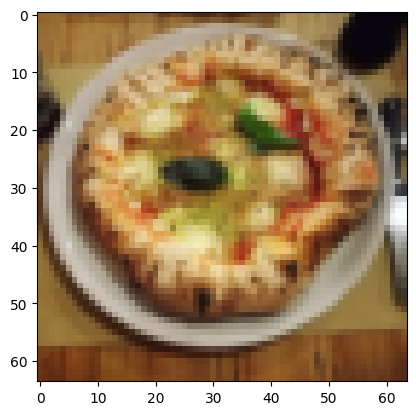

Labels: Onions
Labels: Black olives
Labels: Broccoli


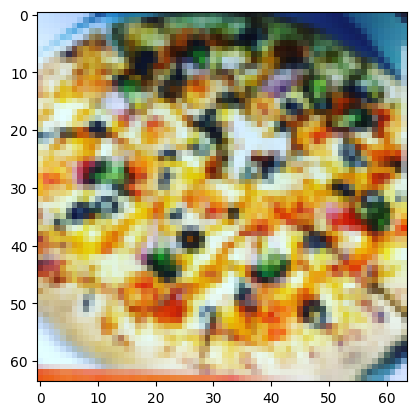

Labels: Black olives
Labels: Arugula


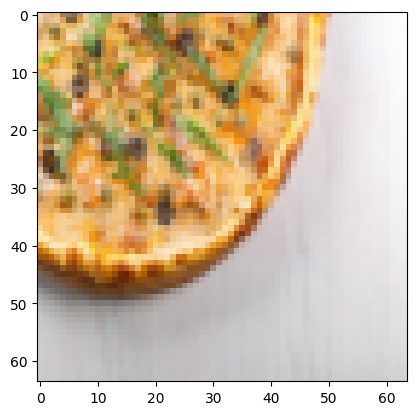

Labels: Tomatoes


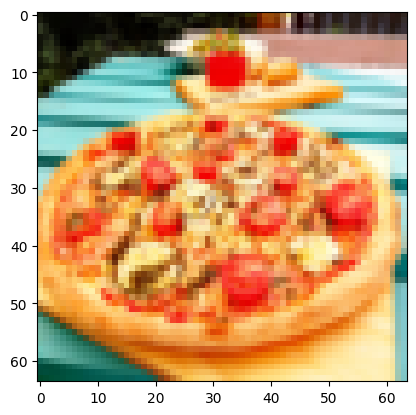

Labels: Onions
Labels: Arugula


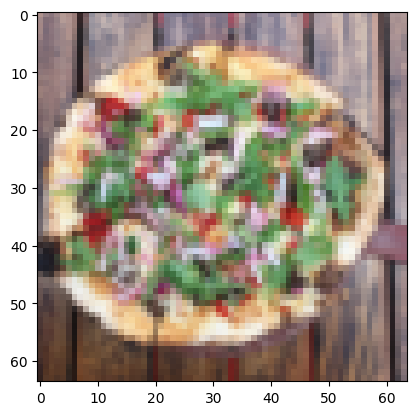

In [66]:
def denormalize(img, mean, std):
    """Denormalizes an image to its original form using mean and std"""
    mean = (
        torch.tensor(mean).reshape(-1, 1, 1)
        if not isinstance(mean, torch.Tensor)
        else mean.reshape(-1, 1, 1)
    )
    std = (
        torch.tensor(std).reshape(-1, 1, 1)
        if not isinstance(std, torch.Tensor)
        else std.reshape(-1, 1, 1)
    )
    denorm_img = img * std + mean  # Apply denormalization
    return denorm_img


def imshow(img, mean, std):
    """Shows an image by first denormalizing it"""
    img = denormalize(img, mean, std)  # Denormalize
    img = torch.clamp(img, 0, 255)  # Ensure the image is within [0, 255]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    return npimg


def display_labels(labels, classes):
    """Display labels given their indices and corresponding class names"""
    for idx, label in enumerate(labels):
        if label == 1:
            print(f"Labels: {classes[idx]}")


# Select random images and plot them with labels
classes = sampled_df.columns[:-1]

# Select random images and plot them with labels
num_images = 5
for i in random.sample(range(len(test_dataset)), num_images):
    image, labels = (
        test_dataset[i][0],
        test_dataset[i][1],
    )  # Ensure that you're accessing the tensor image

    # Display the labels
    display_labels(labels, classes)

    # Display the image
    imshow(image, mean, std)

In [67]:
# Linear Model
class Linear_Model(nn.Module):
    def __init__(self, n_classes):
        super(Linear_Model, self).__init__()
        self.linear_stack = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3),
            nn.Conv2d(64, 96, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3),
            nn.Conv2d(96, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3),
            nn.Flatten(),
            nn.Linear(512, n_classes),
            nn.Sigmoid(),
        )

    def forward(self, x):
        logits = self.linear_stack(x)
        return logits


linear_model = Linear_Model(len(classes)).to(device)
summary(linear_model, (3, 64, 64), device=device)
print("Device is " + device)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 11]                  --
|    └─Conv2d: 2-1                       [-1, 64, 64, 64]          1,792
|    └─ReLU: 2-2                         [-1, 64, 64, 64]          --
|    └─MaxPool2d: 2-3                    [-1, 64, 21, 21]          --
|    └─Conv2d: 2-4                       [-1, 96, 21, 21]          55,392
|    └─ReLU: 2-5                         [-1, 96, 21, 21]          --
|    └─MaxPool2d: 2-6                    [-1, 96, 7, 7]            --
|    └─Conv2d: 2-7                       [-1, 128, 7, 7]           110,720
|    └─ReLU: 2-8                         [-1, 128, 7, 7]           --
|    └─MaxPool2d: 2-9                    [-1, 128, 2, 2]           --
|    └─Flatten: 2-10                     [-1, 512]                 --
|    └─Linear: 2-11                      [-1, 11]                  5,643
|    └─Sigmoid: 2-12                     [-1, 11]                  --


In [68]:
model = linear_model

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.00001)

In [70]:
from sklearn.metrics import average_precision_score

# Lists to store metrics
train_losses = []
train_map_scores = []
validation_losses = []
validation_map_scores = []

# Training and Validation Loop
start_time = time.time()
for epoch in range(epochs):
    # Training Phase
    model.train()  # Set the model to training mode
    train_loss = 0
    train_predicted_scores = []
    train_true_labels = []

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(
            device
        )  # Move data to the appropriate device

        optimizer.zero_grad()  # Zero the gradients to prevent accumulation
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the model

        train_loss += loss.item() * images.size(0)  # Accumulate the loss
        train_predicted_scores.append(outputs.detach().cpu().numpy())
        train_true_labels.append(labels.detach().cpu().numpy())

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    train_predicted_scores = np.concatenate(train_predicted_scores)
    train_true_labels = np.concatenate(train_true_labels)
    train_map_score = average_precision_score(
        train_true_labels, train_predicted_scores, average="macro"
    )
    train_map_scores.append(train_map_score)

    print("Finished Training")

    # Validation Phase
    model.eval()  # Set the model to evaluation mode
    validation_loss = 0
    validation_predicted_scores = []
    validation_true_labels = []

    with torch.no_grad():  # Disable gradient calculation
        for images, labels in tqdm(test_loader):
            images, labels = images.to(device), labels.to(
                device
            )  # Move data to the appropriate device
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss

            validation_loss += loss.item() * images.size(0)  # Accumulate the loss
            validation_predicted_scores.append(outputs.detach().cpu().numpy())
            validation_true_labels.append(labels.detach().cpu().numpy())

    validation_loss /= len(test_loader.dataset)
    validation_losses.append(validation_loss)

    validation_predicted_scores = np.concatenate(validation_predicted_scores)
    validation_true_labels = np.concatenate(validation_true_labels)
    validation_map_score = average_precision_score(
        validation_true_labels, validation_predicted_scores, average="macro"
    )
    validation_map_scores.append(validation_map_score)

    # Print metrics
    print(
        f"Epoch [{epoch+1}/{epochs}], Training Loss: {train_loss:.4f}, Training mAP: {train_map_score:.4f}, Validation Loss: {validation_loss:.4f}, Validation mAP: {validation_map_score:.4f}"
    )

end_time = time.time()
execution_time = end_time - start_time

minutes = int(execution_time // 60)
seconds = int(execution_time % 60)
print(f"\nExecution time: {minutes:02}:{seconds:02}")

100%|██████████| 445/445 [03:37<00:00,  2.05it/s]


Finished Training


100%|██████████| 112/112 [00:50<00:00,  2.20it/s]


Epoch [1/20], Training Loss: 2.8860, Training mAP: 0.2502, Validation Loss: 2.8044, Validation mAP: 0.3537


100%|██████████| 445/445 [03:36<00:00,  2.06it/s]


Finished Training


100%|██████████| 112/112 [00:49<00:00,  2.28it/s]


Epoch [2/20], Training Loss: 2.6800, Training mAP: 0.3874, Validation Loss: 2.6541, Validation mAP: 0.4697


  4%|▍         | 18/445 [00:08<03:32,  2.01it/s]


KeyboardInterrupt: 